In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import airportsdata
import pycountry

In [2]:
tickets_df = pd.read_json('tickets.json')
tickets_df.head()

,value,trip_class,origin,number_of_changes,found_at,destination,depart_date,airline,search_date
0,43270,0,MOW,2.0,2022-03-30 14:54:04,SYZ,2022-04-21,TK,2022-04-02
1,28166,0,MOW,3.0,2022-04-02 08:08:06,SPU,2022-04-25,W6,2022-04-02
2,24159,0,MOW,2.0,2022-04-01 09:23:26,SZF,2022-04-14,TK,2022-04-02
3,11160,0,MOW,1.0,2022-04-02 12:09:50,ABA,2022-04-12,S7,2022-04-02
4,19920,0,MOW,1.0,2022-04-02 12:44:34,CAI,2022-04-14,SU,2022-04-02


In [3]:
tickets_df.rename(columns={'value' : 'price', 
                                  'origin' : 'origin_city_code',
                                  # 'destination' : 'destination_city_code',
                                  'destination' : 'destination_airport_code',
                                  'airline' : 'airline_code'}, inplace=True)
tickets_df.head()

,price,trip_class,origin_city_code,number_of_changes,found_at,destination_airport_code,depart_date,airline_code,search_date
0,43270,0,MOW,2.0,2022-03-30 14:54:04,SYZ,2022-04-21,TK,2022-04-02
1,28166,0,MOW,3.0,2022-04-02 08:08:06,SPU,2022-04-25,W6,2022-04-02
2,24159,0,MOW,2.0,2022-04-01 09:23:26,SZF,2022-04-14,TK,2022-04-02
3,11160,0,MOW,1.0,2022-04-02 12:09:50,ABA,2022-04-12,S7,2022-04-02
4,19920,0,MOW,1.0,2022-04-02 12:44:34,CAI,2022-04-14,SU,2022-04-02


In [4]:
tickets_df.isnull().sum()

price                           0
trip_class                      0
origin_city_code                0
number_of_changes           18148
found_at                        0
destination_airport_code        0
depart_date                     0
airline_code                    0
search_date                     0
dtype: int64

In [5]:
tickets_df.fillna({'number_of_changes' : 0}, inplace=True)
tickets_df.isnull().sum().sum()

0

In [6]:
tickets_df.nunique()

price                       29315
trip_class                      1
origin_city_code                5
number_of_changes               7
found_at                    60263
destination_airport_code     1276
depart_date                   327
airline_code                  173
search_date                    11
dtype: int64

In [7]:
# delete not-used features
tickets_df.drop(columns=['trip_class', 'found_at'], inplace=True)

In [8]:
tickets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106348 entries, 0 to 106347
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   price                     106348 non-null  int64  
 1   origin_city_code          106348 non-null  object 
 2   number_of_changes         106348 non-null  float64
 3   destination_airport_code  106348 non-null  object 
 4   depart_date               106348 non-null  object 
 5   airline_code              106348 non-null  object 
 6   search_date               106348 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 5.7+ MB


In [9]:
tickets_df['diff_days'] = (pd.to_datetime(tickets_df['depart_date']) - pd.to_datetime(tickets_df['search_date'])).dt.days
tickets_df['diff_days'].describe()

count    106348.000000
mean         89.042869
std          68.102751
min          -1.000000
25%          33.000000
50%          73.000000
75%         132.000000
max         325.000000
Name: diff_days, dtype: float64

In [10]:
tickets_df = tickets_df[tickets_df['diff_days'] >= 0]
tickets_df['diff_days'].describe()

count    106052.000000
mean         89.294186
std          68.031148
min           0.000000
25%          34.000000
50%          73.000000
75%         132.000000
max         325.000000
Name: diff_days, dtype: float64

In [11]:
# convert date columns to datetime type
for dt_col in ['depart_date', 'search_date']:
    tickets_df[dt_col] = pd.to_datetime(tickets_df[dt_col])

# convert number_of_changes to int type
tickets_df['number_of_changes'] = tickets_df['number_of_changes'].astype('int8')

In [12]:
tickets_df.head()

,price,origin_city_code,number_of_changes,destination_airport_code,depart_date,airline_code,search_date,diff_days
0,43270,MOW,2,SYZ,2022-04-21,TK,2022-04-02,19
1,28166,MOW,3,SPU,2022-04-25,W6,2022-04-02,23
2,24159,MOW,2,SZF,2022-04-14,TK,2022-04-02,12
3,11160,MOW,1,ABA,2022-04-12,S7,2022-04-02,10
4,19920,MOW,1,CAI,2022-04-14,SU,2022-04-02,12


In [13]:
for dt_col in ['depart_date','search_date']:
    prefix = dt_col.split('_date')[0]
    s_date = tickets_df[dt_col]
    
    tickets_df[f'{prefix}_month'] = s_date.dt.month
    tickets_df[f'{prefix}_weekday'] = s_date.dt.weekday
    tickets_df[f'{prefix}_day'] = s_date.dt.day

tickets_df.head()

,price,origin_city_code,number_of_changes,destination_airport_code,depart_date,airline_code,search_date,diff_days,depart_month,depart_weekday,depart_day,search_month,search_weekday,search_day
0,43270,MOW,2,SYZ,2022-04-21,TK,2022-04-02,19,4,3,21,4,5,2
1,28166,MOW,3,SPU,2022-04-25,W6,2022-04-02,23,4,0,25,4,5,2
2,24159,MOW,2,SZF,2022-04-14,TK,2022-04-02,12,4,3,14,4,5,2
3,11160,MOW,1,ABA,2022-04-12,S7,2022-04-02,10,4,1,12,4,5,2
4,19920,MOW,1,CAI,2022-04-14,SU,2022-04-02,12,4,3,14,4,5,2


In [14]:
# import information about airports
airports_df = pd.read_json('airports.json')
airports_df.head()

,city_code,country_code,name_translations,time_zone,flightable,coordinates,name,code,iata_type
0,PIT,US,{'en': 'Pittsburgh International Airport'},America/New_York,True,"{'lat': 40.49585, 'lon': -80.25657}",Питтсбург Интернэшинл,PIT,airport
1,GAL,US,{'en': 'Edward G. Pitka Sr. Airport'},America/Anchorage,True,"{'lat': 64.73798, 'lon': -156.94186}",Галена,GAL,airport
2,YAG,CA,{'en': 'Fort Frances Municipal Airport'},America/Winnipeg,True,"{'lat': 48.65278, 'lon': -93.44722}",Форт-Франсес,YAG,airport
3,ILD,ES,{'en': 'Lleida Railway Station'},Europe/Madrid,True,"{'lat': 41.61667, 'lon': 0.6333300000000001}",Льейда (жд вокзал),QLQ,railway
4,SVX,RU,{'en': 'Koltsovo International Airport'},Asia/Yekaterinburg,True,"{'lat': 56.750336, 'lon': 60.804314}",Кольцово,SVX,airport


In [15]:
airports_df.describe()

,city_code,country_code,name_translations,time_zone,flightable,coordinates,name,code,iata_type
count,3547,3547,3547,3547,3547,3547,3390,3547,3547
unique,3132,234,3511,367,1,3465,3281,3547,8
top,LON,US,{'en': 'Heliport'},Asia/Shanghai,True,"{'lat': 51.51, 'lon': 0.06}",Лондон (жд вокзал),PIT,airport
freq,15,617,15,194,3547,8,10,1,3137


In [16]:
airports_df['flightable'].nunique()

1

In [17]:
# Feature is useless
airports_df.drop(columns=['flightable'], inplace=True)

In [18]:
airports_df[['name_translations', 'name']].isnull().sum()

name_translations      0
name                 157
dtype: int64

In [19]:
airports_df['airport_name'] = list(map(lambda item: item['en'], airports_df['name_translations']))
airports_df.drop(columns=['name_translations', 'name'], inplace=True)

airports_df.rename(columns={'code' : 'airport_code'}, inplace=True)

# parse latitudes and longs
lats, lons = [], []
for coord in airports_df['coordinates']:
    lats.append(coord['lat'])
    lons.append(coord['lon'])

airports_df['latitude'] = lats
airports_df['longitude'] = lons
airports_df.drop(columns=['coordinates'], inplace=True)
airports_df.head()

,city_code,country_code,time_zone,airport_code,iata_type,airport_name,latitude,longitude
0,PIT,US,America/New_York,PIT,airport,Pittsburgh International Airport,40.495850,-80.256570
1,GAL,US,America/Anchorage,GAL,airport,Edward G. Pitka Sr. Airport,64.737980,-156.941860
2,YAG,CA,America/Winnipeg,YAG,airport,Fort Frances Municipal Airport,48.652780,-93.447220
3,ILD,ES,Europe/Madrid,QLQ,railway,Lleida Railway Station,41.616670,0.633330
4,SVX,RU,Asia/Yekaterinburg,SVX,airport,Koltsovo International Airport,56.750336,60.804314


In [20]:
col_group, col_meas = ['city_code', 'iata_type'], ['airport_code']
col_all = col_group + col_meas
airports_df[col_all].groupby(by=col_group).count().sort_values(by=col_meas, ascending=False)

airport_code
city_code iata_type              
LON       railway               9
          airport               6
CHI       airport               5
SAC       airport               4
DFW       airport               4
...                           ...
HVG       airport               1
HVN       airport               1
          railway               1
HVR       airport               1
ИФА       airport               1

[3353 rows x 1 columns]

In [21]:
airports = airportsdata.load('IATA')  # key is the IATA location code
airports['SYZ']

{'icao': 'OISS',
 'iata': 'SYZ',
 'name': 'Shiraz Shahid Dastghaib International Airport',
 'city': 'Shiraz',
 'subd': 'Fars',
 'country': 'IR',
 'elevation': 4920.0,
 'lat': 29.5392,
 'lon': 52.5898,
 'tz': 'Asia/Tehran',
 'lid': ''}

In [22]:
codes = tickets_df['destination_airport_code'].unique()
missing = []

for code in codes:
    try:
        airports[code]
    except:
        missing.append(code)

print(missing)

['ЗЕЯ', 'BQJ', 'ITU', 'ДЖБ', 'IZM', 'CAS', 'TCI', 'LON', 'СЕН', 'PAR', 'БАТ', 'BAK', 'REK', 'EAP', 'ROM', 'STO', 'NKT', 'QOR', 'ТИО', 'НЖГ', 'BUH', 'SEL', 'MMA', 'MIL', 'ТАУ', 'EYK', 'KIV', 'ЧАР', 'DPT', 'TYO', 'NYC', 'OSA', 'YMQ', 'WAS', 'ХЖР', 'BGG', 'JKT', 'YTO', 'МАМ', 'CHI', 'BJS', 'BUE', 'YEA', 'RIO', 'KVR', 'MOW', 'SDZ', 'ULH', 'DTT', 'QPA', 'SZY', 'SPK', 'BHZ', 'CSL', 'УКО', 'КСЧ', 'ВРЯ', 'GGR']


In [23]:
tickets_df[['origin_city_code', 'destination_airport_code']]

,origin_city_code,destination_airport_code
0,MOW,SYZ
1,MOW,SPU
2,MOW,SZF
3,MOW,ABA
4,MOW,CAI
...,...,...
106343,MOW,KHV
106344,MOW,HKG
106345,MOW,PQC
106346,MOW,EVN


In [24]:
tickets_df.shape

(106052, 14)

In [25]:
airports_df[['city_code', 'airport_code', 'latitude', 'longitude']].groupby('city_code').mean(['latitude', 'longitide'])

,latitude,longitude
city_code,,
,60.728889,96.443333
AAE,36.821392,7.811857
AAH,50.775440,6.081510
AAL,57.057681,9.895006
AAN,24.233866,55.680673
...,...,...
ZYK,22.468485,113.913650
ZYL,24.957598,91.870476
ZZO,50.666668,142.750000


In [26]:
pd.merge(left=tickets_df[['origin_city_code', 'destination_airport_code']],
         right=airports_df[['city_code', 'airport_code', 'latitude', 'longitude']].groupby('city_code').mean(['latitude', 'longitide']),
         left_on='origin_city_code',
         right_on='city_code',
         how='left')

,origin_city_code,destination_airport_code,latitude,longitude
0,MOW,SYZ,55.70184,37.648892
1,MOW,SPU,55.70184,37.648892
2,MOW,SZF,55.70184,37.648892
3,MOW,ABA,55.70184,37.648892
4,MOW,CAI,55.70184,37.648892
...,...,...,...,...
106047,MOW,KHV,55.70184,37.648892
106048,MOW,HKG,55.70184,37.648892
106049,MOW,PQC,55.70184,37.648892
106050,MOW,EVN,55.70184,37.648892


In [27]:
tmp_df = pd.merge(left=tickets_df[['origin_city_code', 'destination_airport_code']],
                  right=airports_df[['city_code', 'airport_code', 'latitude', 'longitude']].groupby('city_code').mean(['latitude', 'longitide']),
                  left_on='origin_city_code',
                  right_on='city_code',
                  how='left')

tmp_df.rename(columns={'latitude' : 'origin_latitude',
                       'longitude' : 'origin_longitude'}, inplace=True)


tmp_df = pd.merge(left=tmp_df,
                  right=airports_df[['city_code', 'airport_code', 'latitude', 'longitude']], 
                  left_on='destination_airport_code', 
                  right_on='airport_code',
                  how='left')

tmp_df.rename(columns={'latitude' : 'destination_latitude',
                       'longitude' : 'destination_longitude'}, inplace=True)

tmp_df.drop(columns=[
    'airport_code', 
    'city_code', 
    ], inplace=True)

tmp_df

,origin_city_code,destination_airport_code,origin_latitude,origin_longitude,destination_latitude,destination_longitude
0,MOW,SYZ,55.70184,37.648892,29.546130,52.589970
1,MOW,SPU,55.70184,37.648892,43.536526,16.299460
2,MOW,SZF,55.70184,37.648892,41.257380,36.555058
3,MOW,ABA,55.70184,37.648892,53.716667,91.500000
4,MOW,CAI,55.70184,37.648892,30.120106,31.406470
...,...,...,...,...,...,...
106047,MOW,KHV,55.70184,37.648892,48.524563,135.168610
106048,MOW,HKG,55.70184,37.648892,22.315248,113.936490
106049,MOW,PQC,55.70184,37.648892,10.223722,103.963240
106050,MOW,EVN,55.70184,37.648892,40.152720,44.398050


In [28]:
tmp_df.shape[0] == tickets_df.shape[0]

True

In [29]:
# function calculated dictance in km between 2 cities
def calculate_distance(df, origin_coordinates, destination_coordinates):
    lat1, lon1 = map(np.radians, df[origin_coordinates].T.values)
    lat2, lon2 = map(np.radians, df[destination_coordinates].T.values)

    x = np.subtract(lat1, lat2)
    y = np.subtract(lon1, lon2)
    
    z = np.sin(x / 2)**2 + np.cos(lat1) * np.cos(lat2) *  np.sin(y / 2)**2
    dist = 6373.0 * (2 * np.arctan2(np.sqrt(z), np.sqrt(1 - z)))
    
    return np.round(dist, 2)

In [30]:
calculate_distance(tmp_df, 
                   origin_coordinates=['origin_latitude', 'origin_longitude'],
                   destination_coordinates=['destination_latitude', 'destination_longitude'])

array([3140.42, 2033.76, 1608.63, ..., 7599.35, 1799.12, 6781.36])

In [31]:
tickets_df['distance'] = calculate_distance(tmp_df,
                                            origin_coordinates=['origin_latitude', 'origin_longitude'],
                                            destination_coordinates=['destination_latitude', 'destination_longitude'])
tickets_df

,price,origin_city_code,number_of_changes,destination_airport_code,depart_date,airline_code,search_date,diff_days,depart_month,depart_weekday,depart_day,search_month,search_weekday,search_day,distance
0,43270,MOW,2,SYZ,2022-04-21,TK,2022-04-02,19,4,3,21,4,5,2,3140.42
1,28166,MOW,3,SPU,2022-04-25,W6,2022-04-02,23,4,0,25,4,5,2,2033.76
2,24159,MOW,2,SZF,2022-04-14,TK,2022-04-02,12,4,3,14,4,5,2,1608.63
3,11160,MOW,1,ABA,2022-04-12,S7,2022-04-02,10,4,1,12,4,5,2,3379.79
4,19920,MOW,1,CAI,2022-04-14,SU,2022-04-02,12,4,3,14,4,5,2,2887.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106343,13133,MOW,1,KHV,2022-12-09,S7,2022-02-10,302,12,4,9,2,3,10,6144.50
106344,23341,MOW,1,HKG,2022-12-28,TK,2022-02-10,321,12,2,28,2,3,10,7126.65
106345,44964,MOW,3,PQC,2022-12-28,QR,2022-02-10,321,12,2,28,2,3,10,7599.35
106346,5830,MOW,0,EVN,2022-12-06,S7,2022-02-10,299,12,1,6,2,3,10,1799.12


In [32]:
# # prepare new feauteres to join
# col_group, coords = ['city_code', 'country_code'], ['latitude', 'longitude']
# ind = airports_dataframe.groupby(col_group).latitude.idxmin()
# df_join = airports_dataframe[col_group + coords]\
#     .loc[ind, ]\
#     .set_index('city_code').copy()

# tickets_dataframe = tickets_dataframe.join(df_join['country_code'], on='destination_airport_code')
# for direction in ['origin_airport_code', 'destination_airport_code']:
#     tickets_dataframe = tickets_dataframe.join(df_join[coords], on=direction, rsuffix=f'_{direction}')

# tickets_dataframe['distance'] = calculate_distance(df_join, origin_coordinates=['latitude', 'longitude'], destination_coordinates=['lat_destination', 'lon_destination'])

# tickets_dataframe['abroad'] =  (tickets_dataframe['country_code'] != 'RU').astype('int8')
# tickets_dataframe.head()

In [33]:
# import information about Airlines
airlines_df = pd.read_json('airlines.json')
airlines_df

,name,code,name_translations
0,None,DN,{'en': 'Norwegian Air'}
1,None,AI,{'en': 'Air India'}
2,None,V1,"{'en': 'IBS Software Services Americas, Inc.'}"
3,None,DE,{'en': 'Condor'}
4,Аврора,HZ,{'en': 'Aurora'}
...,...,...,...
1062,None,HX,{'en': 'Hong Kong Airlines'}
1063,None,N7,{'en': 'Nordic Regional Airline'}
1064,None,B6,{'en': 'JetBlue Airways'}
1065,Air Iceland,NY,{'en': 'Air Iceland'}


In [34]:
airlines_df['name'] = list(map(lambda item: item['en'], airlines_df['name_translations']))
airlines_df.drop(columns=['name_translations'], inplace=True)
airlines_df = airlines_df[['code', 'name']]
airlines_df.rename(columns={'code': 'airline_code', 'name': 'airline_name'}, inplace=True)
airlines_df

,airline_code,airline_name
0,DN,Norwegian Air
1,AI,Air India
2,V1,"IBS Software Services Americas, Inc."
3,DE,Condor
4,HZ,Aurora
...,...,...
1062,HX,Hong Kong Airlines
1063,N7,Nordic Regional Airline
1064,B6,JetBlue Airways
1065,NY,Air Iceland


In [35]:
airlines_df[['airline_code', 'airline_name']].nunique()

airline_code    1067
airline_name    1043
dtype: int64

In [36]:
counts = airlines_df.airline_name.value_counts()
airlines_df[airlines_df.airline_name.isin(counts.index[counts.gt(1)])].sort_values('airline_name')

,airline_code,airline_name
427,I9,Air Italy
608,IG,Air Italy
705,P2,Airkenya Express
639,QP,Airkenya Express
69,Z7,Amaszonas
339,Z8,Amaszonas
1019,ТФ,Avia Traffic Company
125,YK,Avia Traffic Company
782,3R,Avior Airlines
493,9V,Avior Airlines


In [37]:
# tmp_df = airlines_df.groupby(['airline_name']).count()
# airline_names = tmp_df[tmp_df['airline_code'] > 1].index
# mask = airlines_df['airline_name'].isin(airline_names)
# airlines_df[mask].sort_values(by='airline_name')

In [38]:
airports_df

,city_code,country_code,time_zone,airport_code,iata_type,airport_name,latitude,longitude
0,PIT,US,America/New_York,PIT,airport,Pittsburgh International Airport,40.495850,-80.256570
1,GAL,US,America/Anchorage,GAL,airport,Edward G. Pitka Sr. Airport,64.737980,-156.941860
2,YAG,CA,America/Winnipeg,YAG,airport,Fort Frances Municipal Airport,48.652780,-93.447220
3,ILD,ES,Europe/Madrid,QLQ,railway,Lleida Railway Station,41.616670,0.633330
4,SVX,RU,Asia/Yekaterinburg,SVX,airport,Koltsovo International Airport,56.750336,60.804314
...,...,...,...,...,...,...,...,...
3542,JPA,BR,America/Fortaleza,JPA,airport,Presidente Castro Pinto International Airport,-7.145357,-34.948160
3543,MOL,NO,Europe/Oslo,MOL,airport,"Molde Airport, Aro",62.747303,7.262118
3544,,RU,,КЯС,airline,Cheremshanka,56.176666,92.543335
3545,,RU,,ТАУ,airline,Gornyj,64.333336,100.433334


In [39]:
df = pd.merge(left=tickets_df,
              right=airlines_df,
              left_on='airline_code',
              right_on='airline_code',
              how='inner')

df = pd.merge(left=df, 
              right=airports_df[['airport_code', 'city_code', 'country_code', 'time_zone', 'iata_type', 'airport_name']], 
              left_on='destination_airport_code',
              right_on='airport_code',
              how='inner')

df

,price,origin_city_code,number_of_changes,destination_airport_code,depart_date,airline_code,search_date,diff_days,depart_month,depart_weekday,...,search_weekday,search_day,distance,airline_name,airport_code,city_code,country_code,time_zone,iata_type,airport_name
0,43270,MOW,2,SYZ,2022-04-21,TK,2022-04-02,19,4,3,...,5,2,3140.42,Turkish Airlines,SYZ,SYZ,IR,Asia/Tehran,airport,Shiraz International Airport
1,28166,MOW,3,SPU,2022-04-25,W6,2022-04-02,23,4,0,...,5,2,2033.76,Wizz Air,SPU,SPU,HR,Europe/Zagreb,airport,Split Airport
2,24159,MOW,2,SZF,2022-04-14,TK,2022-04-02,12,4,3,...,5,2,1608.63,Turkish Airlines,SZF,SZF,TR,Europe/Istanbul,airport,Samsun-Carsamba Airport
3,11160,MOW,1,ABA,2022-04-12,S7,2022-04-02,10,4,1,...,5,2,3379.79,S7 Airlines,ABA,ABA,RU,Asia/Krasnoyarsk,airport,Abakan Airport
4,19920,MOW,1,CAI,2022-04-14,SU,2022-04-02,12,4,3,...,5,2,2887.81,Aeroflot,CAI,CAI,EG,Africa/Cairo,airport,Cairo International Airport
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97567,13133,MOW,1,KHV,2022-12-09,S7,2022-02-10,302,12,4,...,3,10,6144.50,S7 Airlines,KHV,KHV,RU,Asia/Vladivostok,airport,Khabarovsk Airport
97568,23341,MOW,1,HKG,2022-12-28,TK,2022-02-10,321,12,2,...,3,10,7126.65,Turkish Airlines,HKG,HKG,HK,Asia/Hong_Kong,airport,Hong Kong International Airport
97569,44964,MOW,3,PQC,2022-12-28,QR,2022-02-10,321,12,2,...,3,10,7599.35,Qatar Airways,PQC,PQC,VN,Asia/Ho_Chi_Minh,airport,Phu Quoc Airport
97570,5830,MOW,0,EVN,2022-12-06,S7,2022-02-10,299,12,1,...,3,10,1799.12,S7 Airlines,EVN,EVN,AM,Asia/Yerevan,airport,Zvartnots International Airport


In [40]:
df.rename(columns={'airport_name' : 'destination_airport_name',
                   'city_code' : 'destination_city_code',
                   'country_code' : 'destination_country_code'}, inplace=True)

df.drop(columns=[
    'airport_code',
    # 'latitude',
    # 'longitude'
    ], inplace=True)

df

,price,origin_city_code,number_of_changes,destination_airport_code,depart_date,airline_code,search_date,diff_days,depart_month,depart_weekday,...,search_month,search_weekday,search_day,distance,airline_name,destination_city_code,destination_country_code,time_zone,iata_type,destination_airport_name
0,43270,MOW,2,SYZ,2022-04-21,TK,2022-04-02,19,4,3,...,4,5,2,3140.42,Turkish Airlines,SYZ,IR,Asia/Tehran,airport,Shiraz International Airport
1,28166,MOW,3,SPU,2022-04-25,W6,2022-04-02,23,4,0,...,4,5,2,2033.76,Wizz Air,SPU,HR,Europe/Zagreb,airport,Split Airport
2,24159,MOW,2,SZF,2022-04-14,TK,2022-04-02,12,4,3,...,4,5,2,1608.63,Turkish Airlines,SZF,TR,Europe/Istanbul,airport,Samsun-Carsamba Airport
3,11160,MOW,1,ABA,2022-04-12,S7,2022-04-02,10,4,1,...,4,5,2,3379.79,S7 Airlines,ABA,RU,Asia/Krasnoyarsk,airport,Abakan Airport
4,19920,MOW,1,CAI,2022-04-14,SU,2022-04-02,12,4,3,...,4,5,2,2887.81,Aeroflot,CAI,EG,Africa/Cairo,airport,Cairo International Airport
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97567,13133,MOW,1,KHV,2022-12-09,S7,2022-02-10,302,12,4,...,2,3,10,6144.50,S7 Airlines,KHV,RU,Asia/Vladivostok,airport,Khabarovsk Airport
97568,23341,MOW,1,HKG,2022-12-28,TK,2022-02-10,321,12,2,...,2,3,10,7126.65,Turkish Airlines,HKG,HK,Asia/Hong_Kong,airport,Hong Kong International Airport
97569,44964,MOW,3,PQC,2022-12-28,QR,2022-02-10,321,12,2,...,2,3,10,7599.35,Qatar Airways,PQC,VN,Asia/Ho_Chi_Minh,airport,Phu Quoc Airport
97570,5830,MOW,0,EVN,2022-12-06,S7,2022-02-10,299,12,1,...,2,3,10,1799.12,S7 Airlines,EVN,AM,Asia/Yerevan,airport,Zvartnots International Airport


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97572 entries, 0 to 97571
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   price                     97572 non-null  int64         
 1   origin_city_code          97572 non-null  object        
 2   number_of_changes         97572 non-null  int8          
 3   destination_airport_code  97572 non-null  object        
 4   depart_date               97572 non-null  datetime64[ns]
 5   airline_code              97572 non-null  object        
 6   search_date               97572 non-null  datetime64[ns]
 7   diff_days                 97572 non-null  int64         
 8   depart_month              97572 non-null  int32         
 9   depart_weekday            97572 non-null  int32         
 10  depart_day                97572 non-null  int32         
 11  search_month              97572 non-null  int32         
 12  search_weekday    

In [42]:
df[['airline_code', 'airline_name']].nunique()

airline_code    160
airline_name    156
dtype: int64

In [43]:
df.drop(columns=['airline_code'], inplace=True)
df.rename(columns={'airline_name' : 'airline'}, inplace=True)
df

,price,origin_city_code,number_of_changes,destination_airport_code,depart_date,search_date,diff_days,depart_month,depart_weekday,depart_day,search_month,search_weekday,search_day,distance,airline,destination_city_code,destination_country_code,time_zone,iata_type,destination_airport_name
0,43270,MOW,2,SYZ,2022-04-21,2022-04-02,19,4,3,21,4,5,2,3140.42,Turkish Airlines,SYZ,IR,Asia/Tehran,airport,Shiraz International Airport
1,28166,MOW,3,SPU,2022-04-25,2022-04-02,23,4,0,25,4,5,2,2033.76,Wizz Air,SPU,HR,Europe/Zagreb,airport,Split Airport
2,24159,MOW,2,SZF,2022-04-14,2022-04-02,12,4,3,14,4,5,2,1608.63,Turkish Airlines,SZF,TR,Europe/Istanbul,airport,Samsun-Carsamba Airport
3,11160,MOW,1,ABA,2022-04-12,2022-04-02,10,4,1,12,4,5,2,3379.79,S7 Airlines,ABA,RU,Asia/Krasnoyarsk,airport,Abakan Airport
4,19920,MOW,1,CAI,2022-04-14,2022-04-02,12,4,3,14,4,5,2,2887.81,Aeroflot,CAI,EG,Africa/Cairo,airport,Cairo International Airport
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97567,13133,MOW,1,KHV,2022-12-09,2022-02-10,302,12,4,9,2,3,10,6144.50,S7 Airlines,KHV,RU,Asia/Vladivostok,airport,Khabarovsk Airport
97568,23341,MOW,1,HKG,2022-12-28,2022-02-10,321,12,2,28,2,3,10,7126.65,Turkish Airlines,HKG,HK,Asia/Hong_Kong,airport,Hong Kong International Airport
97569,44964,MOW,3,PQC,2022-12-28,2022-02-10,321,12,2,28,2,3,10,7599.35,Qatar Airways,PQC,VN,Asia/Ho_Chi_Minh,airport,Phu Quoc Airport
97570,5830,MOW,0,EVN,2022-12-06,2022-02-10,299,12,1,6,2,3,10,1799.12,S7 Airlines,EVN,AM,Asia/Yerevan,airport,Zvartnots International Airport


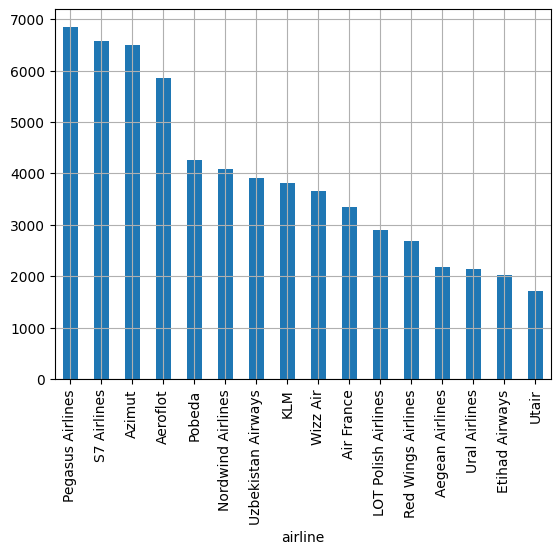

In [44]:
number_of_airlines = 17
ax = df.airline.value_counts()[1:number_of_airlines].plot.bar(log=False, rot = 90, grid=True)

In [45]:
airlines = df.airline.value_counts()[:number_of_airlines]
airline_mask = df.airline.isin(airlines.index)
df = df[airline_mask]
df['airline'].nunique()

17

In [46]:
df.isnull().sum()

price                       0
origin_city_code            0
number_of_changes           0
destination_airport_code    0
depart_date                 0
search_date                 0
diff_days                   0
depart_month                0
depart_weekday              0
depart_day                  0
search_month                0
search_weekday              0
search_day                  0
distance                    0
airline                     0
destination_city_code       0
destination_country_code    0
time_zone                   0
iata_type                   0
destination_airport_name    0
dtype: int64

In [47]:
df.isna().sum()

price                       0
origin_city_code            0
number_of_changes           0
destination_airport_code    0
depart_date                 0
search_date                 0
diff_days                   0
depart_month                0
depart_weekday              0
depart_day                  0
search_month                0
search_weekday              0
search_day                  0
distance                    0
airline                     0
destination_city_code       0
destination_country_code    0
time_zone                   0
iata_type                   0
destination_airport_name    0
dtype: int64

In [48]:
df[df['destination_city_code'] == '']

,price,origin_city_code,number_of_changes,destination_airport_code,depart_date,search_date,diff_days,depart_month,depart_weekday,depart_day,search_month,search_weekday,search_day,distance,airline,destination_city_code,destination_country_code,time_zone,iata_type,destination_airport_name
327,24555,MOW,1,ТАУ,2022-04-05,2022-04-02,3,4,1,5,4,5,2,3459.75,Aeroflot,,RU,,airline,Gornyj
8310,24555,MOW,1,ТАУ,2022-04-05,2022-04-03,2,4,1,5,4,6,3,3459.75,Aeroflot,,RU,,airline,Gornyj
20785,24555,MOW,1,ТАУ,2022-04-05,2022-04-04,1,4,1,5,4,0,4,3459.75,Aeroflot,,RU,,airline,Gornyj
28839,24510,MOW,1,ТАУ,2022-04-15,2022-04-08,7,4,4,15,4,4,8,3459.75,Aeroflot,,RU,,airline,Gornyj
32504,29165,LED,1,ТАУ,2022-04-28,2022-04-08,20,4,3,28,4,4,8,3490.76,Aeroflot,,RU,,airline,Gornyj
40170,24510,MOW,1,ТАУ,2022-04-15,2022-04-09,6,4,4,15,4,5,9,3459.75,Aeroflot,,RU,,airline,Gornyj
43847,29165,LED,1,ТАУ,2022-04-28,2022-04-09,19,4,3,28,4,5,9,3490.76,Aeroflot,,RU,,airline,Gornyj
51567,24510,MOW,1,ТАУ,2022-04-15,2022-04-05,10,4,4,15,4,1,5,3459.75,Aeroflot,,RU,,airline,Gornyj
59739,24510,MOW,1,ТАУ,2022-04-15,2022-04-06,9,4,4,15,4,2,6,3459.75,Aeroflot,,RU,,airline,Gornyj
70835,24510,MOW,1,ТАУ,2022-04-15,2022-04-11,4,4,4,15,4,0,11,3459.75,Aeroflot,,RU,,airline,Gornyj


In [49]:
df[['destination_airport_code', 'destination_city_code', 'destination_country_code']].nunique()

destination_airport_code    1054
destination_city_code       1054
destination_country_code     185
dtype: int64

In [50]:
df[df['destination_airport_code'] != df['destination_city_code']]

,price,origin_city_code,number_of_changes,destination_airport_code,depart_date,search_date,diff_days,depart_month,depart_weekday,depart_day,search_month,search_weekday,search_day,distance,airline,destination_city_code,destination_country_code,time_zone,iata_type,destination_airport_name
327,24555,MOW,1,ТАУ,2022-04-05,2022-04-02,3,4,1,5,4,5,2,3459.75,Aeroflot,,RU,,airline,Gornyj
8310,24555,MOW,1,ТАУ,2022-04-05,2022-04-03,2,4,1,5,4,6,3,3459.75,Aeroflot,,RU,,airline,Gornyj
20785,24555,MOW,1,ТАУ,2022-04-05,2022-04-04,1,4,1,5,4,0,4,3459.75,Aeroflot,,RU,,airline,Gornyj
28839,24510,MOW,1,ТАУ,2022-04-15,2022-04-08,7,4,4,15,4,4,8,3459.75,Aeroflot,,RU,,airline,Gornyj
32504,29165,LED,1,ТАУ,2022-04-28,2022-04-08,20,4,3,28,4,4,8,3490.76,Aeroflot,,RU,,airline,Gornyj
40170,24510,MOW,1,ТАУ,2022-04-15,2022-04-09,6,4,4,15,4,5,9,3459.75,Aeroflot,,RU,,airline,Gornyj
43847,29165,LED,1,ТАУ,2022-04-28,2022-04-09,19,4,3,28,4,5,9,3490.76,Aeroflot,,RU,,airline,Gornyj
51567,24510,MOW,1,ТАУ,2022-04-15,2022-04-05,10,4,4,15,4,1,5,3459.75,Aeroflot,,RU,,airline,Gornyj
59739,24510,MOW,1,ТАУ,2022-04-15,2022-04-06,9,4,4,15,4,2,6,3459.75,Aeroflot,,RU,,airline,Gornyj
70835,24510,MOW,1,ТАУ,2022-04-15,2022-04-11,4,4,4,15,4,0,11,3459.75,Aeroflot,,RU,,airline,Gornyj


In [53]:
df.drop(columns=['destination_city_code'], inplace=True)
df

,price,origin_city_code,number_of_changes,destination_airport_code,depart_date,search_date,diff_days,depart_month,depart_weekday,depart_day,search_month,search_weekday,search_day,distance,airline,destination_country_code,time_zone,iata_type,destination_airport_name
0,43270,MOW,2,SYZ,2022-04-21,2022-04-02,19,4,3,21,4,5,2,3140.42,Turkish Airlines,IR,Asia/Tehran,airport,Shiraz International Airport
1,28166,MOW,3,SPU,2022-04-25,2022-04-02,23,4,0,25,4,5,2,2033.76,Wizz Air,HR,Europe/Zagreb,airport,Split Airport
2,24159,MOW,2,SZF,2022-04-14,2022-04-02,12,4,3,14,4,5,2,1608.63,Turkish Airlines,TR,Europe/Istanbul,airport,Samsun-Carsamba Airport
3,11160,MOW,1,ABA,2022-04-12,2022-04-02,10,4,1,12,4,5,2,3379.79,S7 Airlines,RU,Asia/Krasnoyarsk,airport,Abakan Airport
4,19920,MOW,1,CAI,2022-04-14,2022-04-02,12,4,3,14,4,5,2,2887.81,Aeroflot,EG,Africa/Cairo,airport,Cairo International Airport
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97566,17227,MOW,2,FAO,2022-12-31,2022-02-10,324,12,5,31,2,3,10,3970.80,LOT Polish Airlines,PT,Europe/Lisbon,airport,Faro Airport
97567,13133,MOW,1,KHV,2022-12-09,2022-02-10,302,12,4,9,2,3,10,6144.50,S7 Airlines,RU,Asia/Vladivostok,airport,Khabarovsk Airport
97568,23341,MOW,1,HKG,2022-12-28,2022-02-10,321,12,2,28,2,3,10,7126.65,Turkish Airlines,HK,Asia/Hong_Kong,airport,Hong Kong International Airport
97570,5830,MOW,0,EVN,2022-12-06,2022-02-10,299,12,1,6,2,3,10,1799.12,S7 Airlines,AM,Asia/Yerevan,airport,Zvartnots International Airport


In [54]:
df[['destination_airport_code', 'destination_country_code']].nunique()

destination_airport_code    1054
destination_country_code     185
dtype: int64

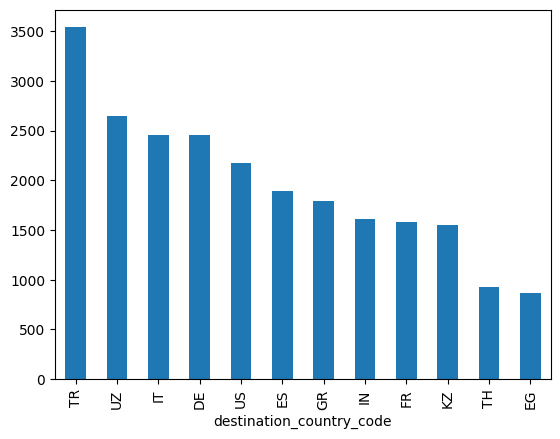

In [55]:
number_of_countries = 13
ax = df.destination_country_code.value_counts()[1:number_of_countries].plot.bar(rot = 90, log=False)

In [65]:
country_mask = df.destination_country_code.isin(df.destination_country_code.value_counts()[:number_of_countries].index)
df = df[country_mask]

In [66]:
df.nunique()

price                       12809
origin_city_code                5
number_of_changes               7
destination_airport_code      495
depart_date                   326
search_date                    11
diff_days                     325
depart_month                   11
depart_weekday                  7
depart_day                     31
search_month                    2
search_weekday                  7
search_day                     10
distance                     1581
airline                        17
destination_country_code       13
time_zone                      47
iata_type                       3
destination_airport_name      495
dtype: int64

In [67]:
final_df = df[['airline', 'number_of_changes', 'origin_city_code', 'destination_country_code', 'search_date', 'depart_date', 'diff_days', 'distance', 'price']]

In [72]:
# final_df.to_json("df.json")

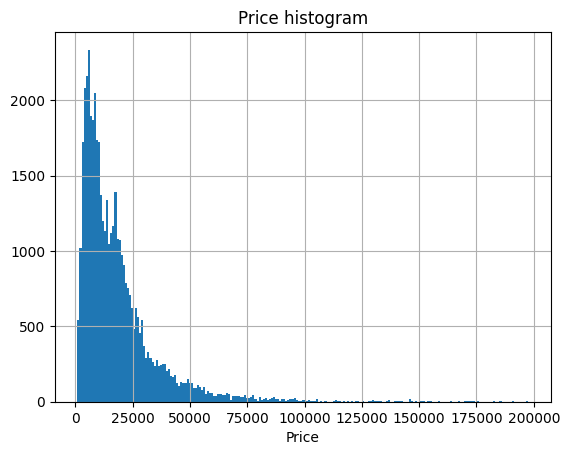

In [73]:
plt.hist(df['price'][df['price'] < 200000], bins='auto')
plt.title('Price histogram')
plt.xlabel('Price')
plt.grid()
plt.show()

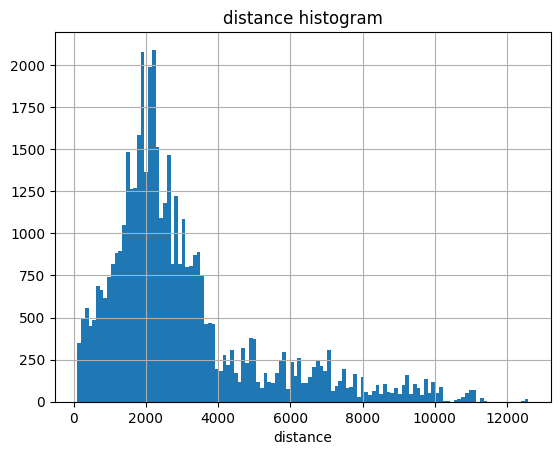

In [74]:
plt.hist(df['distance'], bins='auto')
plt.title('distance histogram')
plt.xlabel('distance')
plt.grid()
plt.show()

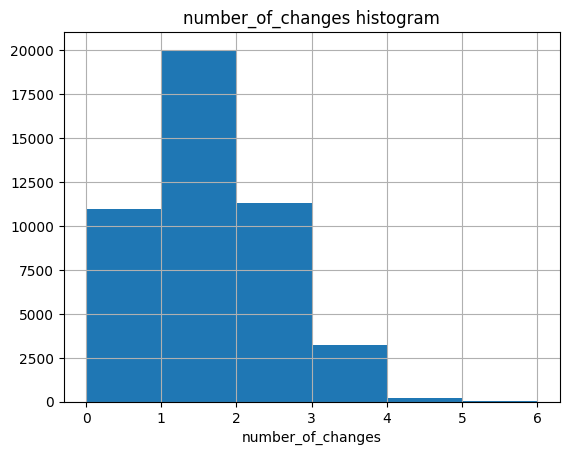

In [81]:
plt.hist(df['number_of_changes'], density=False, bins=6)
plt.title('number_of_changes histogram')
plt.xlabel('number_of_changes')
plt.grid()
plt.show()

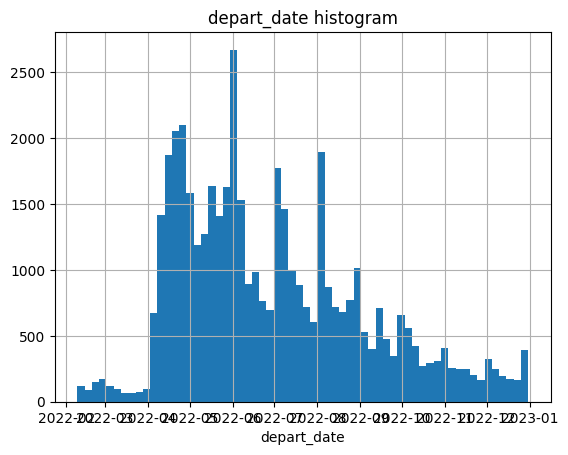

In [85]:
plt.hist(df['depart_date'], bins='auto')
plt.title('depart_date histogram')
plt.xlabel('depart_date')
plt.grid()
plt.show()